In [ ]:
# imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

In [ ]:
# creating and loading the iris database

df_iris = sns.load_dataset('iris')

In [ ]:
# print the first 3 rows

df_iris.head(3)

In [ ]:
# print the number of rows and columns (shape)

df_iris.shape

In [ ]:
# print the column names

df_iris.columns

In [ ]:
# print the data type of each column

df_iris.dtypes

In [ ]:
# print the summary statistics for each of the numeric variables

df_iris.describe().T #.T Transpose the data

In [ ]:
# print the unique values for each of your categorical variables

df_iris.nunique()

In [ ]:
# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel

df_excel = pd.read_excel("Cust_Churn_Telco.xlsx")

In [ ]:
df_excel.head(3).T

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
# df_excel_sample= [df_excel.head(100)].copy()
# df_excel_sample

In [ ]:
# Assign the first 100 rows
# Solution
df_excel_sample = df_excel.loc[0:100, :].copy() # Why am I using .copy, here?
df_excel_sample.head()

In [ ]:
# print the number of rows of your original dataframe
len(df_excel.index)

In [ ]:
# print the first 5 column names
df_excel.columns[:5]

In [ ]:
# print the column names that have a data type of object
df_excel.select_dtypes(include=['object']).columns

In [ ]:
df_excel.head()

In [ ]:
df_excel.max()

In [ ]:
df_excel.min()

In [ ]:
tenure_range = df_excel.tenure.max() - df_excel.tenure.min()
month_range = df_excel.MonthlyCharges.max() - df_excel.MonthlyCharges.min()
total_range = df_excel.TotalCharges.max() - df_excel.TotalCharges.min()

In [ ]:
# compute the range for each of the numeric variables.
numerics = df_excel.select_dtypes(include=['float64', 'int64'])

In [ ]:
# solution
print("Range from min-max of numeric values")
numerics.max() - numerics.min()

In [ ]:
# compute the range for each of the numeric variables.
print(tenure_range, month_range, total_range)

In [ ]:
# Read the data from this google sheet into a dataframe, df_google

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

In [ ]:
# print the first 3 rows
df_google.head(3)

In [ ]:
# print the number of rows and columns
df_google.shape

In [ ]:
# print the column names
df_google.columns

In [ ]:
# print the data type of each column
df_google.dtypes

In [ ]:
# print the summary statistics for each of the numeric variables

df_google.describe()

In [ ]:
df_google.nunique()

In [ ]:
# print the unique values for each of your categorical variables
# solution
for column in df_google.select_dtypes(include='object').columns:
    print(f"Values in the {column} column:")
    print(df_google[column].value_counts())
    print("------")
    print()

In [ ]:
#aquire.py exercises
# getting data from titanic_db in codeup db
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/titanic_db'
    
def get_db_url(user,password,host,database):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [ ]:
# getting data from titanic_db in codeup db
import pandas as pd
from env import user, password, host

pd.read_sql("select * from passengers", get_db_url(user, password, host, 'titanic_db'))

In [ ]:
# getting data from iris_db from codeup db

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'
    
def get_db_url(user,password,host,database):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [ ]:
# getting data from iris_db from codeup db

import pandas as pd
from env import user, password, host

pd.read_sql("select * from species join measurements using(species_id)", get_db_url(user, password, host, 'iris_db'))

In [ ]:
# df.to_csv("get_titanic_data.csv")

# Using the Iris Data:

- 1. Use the function defined in acquire.py to load the iris data.
- 2. Drop the species_id and measurement_id columns.
- 3. Rename the species_name column to just species.
- 4. Create dummy variables of the species name.
- 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

In [2]:
# getting iris data from acquire 
df = acquire.get_iris_data()

In [3]:
# check yo head
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,measurement_id
0,1,setosa,5.1,3.5,1.4,0.2,1
1,1,setosa,4.9,3.0,1.4,0.2,2
2,1,setosa,4.7,3.2,1.3,0.2,3
3,1,setosa,4.6,3.1,1.5,0.2,4
4,1,setosa,5.0,3.6,1.4,0.2,5


In [4]:
# Drop the species_id and measurement_id columns 
# mesurement_id not selected in aquire file
df = df.drop(columns = ['species_id', 'measurement_id'])

In [5]:
# check_yo_head
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [6]:
# Rename the species_name column to just species.

df = df.rename(columns={"species_name": "species"})

In [7]:
# check_yo_head
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [8]:
# Create dummy variables of the species name.
df_dummy = pd.get_dummies(df[['species']])

In [9]:
# check_yo_dummy_head
df_dummy.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [10]:
# append dummy df cols to the original df. 
df = pd.concat([df, df_dummy], axis = 1)

In [11]:
# check_yo_head
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [13]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris_data(df):

    df.drop(columns = ['species_id'])
    df.rename(columns={"species_name": "species"})
    df_dummy = pd.get_dummies(df[['species']])
    
    return pd.concat([df, df_dummy], axis = 1)

In [14]:
prep_iris_data

<function __main__.prep_iris_data(df)>

In [15]:
# acquire data again
df = acquire.get_iris_data()

In [16]:
df = acquire.get_titanic_data()

In [17]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


# Eploratory Analysis Exercises

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:
   - 1. Acquire, prepare & split your data.
   - 2. Univariate Stats
        - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
        - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
        - Document takeaways & any actions.

In [102]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import acquire
import explore

In [35]:
# acquire data again
df = acquire.get_iris_data()

In [36]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,measurement_id
0,1,setosa,5.1,3.5,1.4,0.2,1
1,1,setosa,4.9,3.0,1.4,0.2,2
2,1,setosa,4.7,3.2,1.3,0.2,3
3,1,setosa,4.6,3.1,1.5,0.2,4
4,1,setosa,5.0,3.6,1.4,0.2,5


In [37]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris(df):

    '''Prepares acquired Iris data for exploration'''
    
    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')
    
    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})
    
    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)
    
    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [38]:
df = prep_iris(df)
df.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,measurement_id,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,1,0,0
1,setosa,4.9,3.0,1.4,0.2,2,1,0,0


In [66]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [67]:
print(train.shape, validate.shape, test.shape)

(84, 9) (36, 9) (30, 9)


In [68]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on species.
    return train, validate, test DataFrames.
    '''
    
    # splits df into train_validate and test using train_test_split() stratifying on species to get an even mix of each species
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
    
    # splits train_validate into train and validate using train_test_split() stratifying on species to get an even mix of each species
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    return train, validate, test

In [147]:
train, validate, test = train_validate_test_split(df, target='species')
train.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,measurement_id,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,80,0,1,0
36,setosa,5.5,3.5,1.3,0.2,37,1,0,0
133,virginica,6.3,2.8,5.1,1.5,134,0,0,1


In [70]:
print(train.shape, validate.shape, test.shape)

(84, 9) (36, 9) (30, 9)


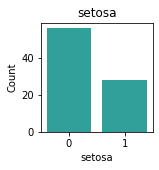

   setosa  Count  Percent
0       0     56    66.67
1       1     28    33.33
_________________________________________________________________


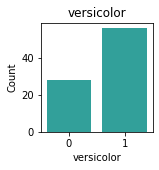

   versicolor  Count  Percent
0           1     56    66.67
1           0     28    33.33
_________________________________________________________________


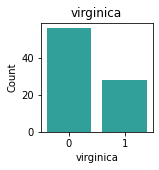

   virginica  Count  Percent
0          0     56    66.67
1          1     28    33.33
_________________________________________________________________


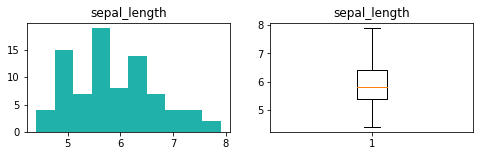

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


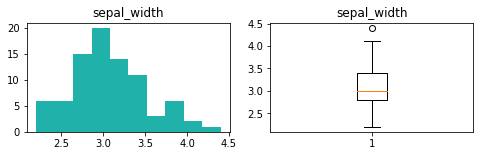

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


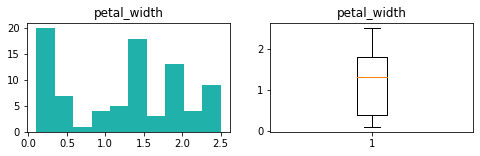

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


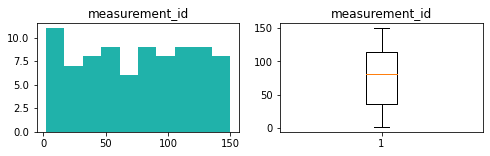

count     84.000000
mean      75.452381
std       44.561695
min        2.000000
25%       36.750000
50%       81.000000
75%      113.500000
max      150.000000
Name: measurement_id, dtype: float64


In [170]:
# 2. Univariate Stats

cat_var = ['setosa', 'versicolor', 'virginica']
quant_var = ['sepal_length', 'sepal_width', 'petal_width', 'measurement_id']

explore.explore_univariate(train, cat_var, quant_var)

In [93]:
# For each measurement type (quantitative variable): 
# create a histogram, boxplot, & compute descriptive statistics (using .describe()).

def explore_univariate(train, cat_var, quant_var):
    for var in cat_var:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_var:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

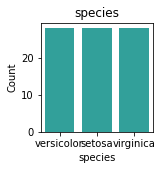

               species  Count  Percent
virginica   versicolor     28    33.33
versicolor      setosa     28    33.33
setosa       virginica     28    33.33
_________________________________________________________________


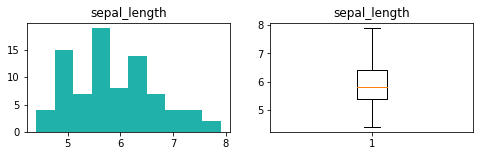

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


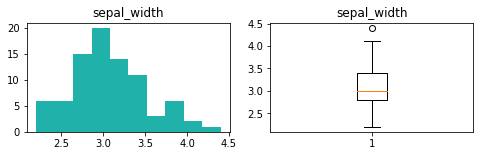

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


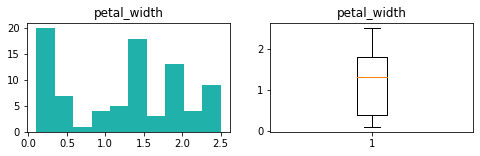

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


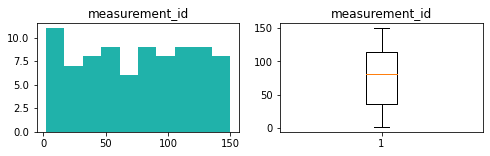

count     84.000000
mean      75.452381
std       44.561695
min        2.000000
25%       36.750000
50%       81.000000
75%      113.500000
max      150.000000
Name: measurement_id, dtype: float64


In [94]:
explore_univariate(train, cat_var, quant_var)

## Thoughts about the iris data

# Bivariate Stats

In [148]:
print(cat_vars)
print(quant_vars)

['species']
['sepal_length', 'sepal_width', 'petal_width', 'measurement_id']


In [158]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,measurement_id,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,1,0,0
1,setosa,4.9,3.0,1.4,0.2,2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,3,1,0,0
3,setosa,4.6,3.1,1.5,0.2,4,1,0,0
4,setosa,5.0,3.6,1.4,0.2,5,1,0,0


In [171]:
cat_vars = ['setosa', 'versicolor', 'virginica']
quant_vars = ['sepal_length', 'sepal_width', 'petal_width', 'measurement_id']

In [183]:
cat_vars = cat_vars[1:]

In [184]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 setosa      0   1  All
virginica             
0          28  28   56
1          28   0   28
All        56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


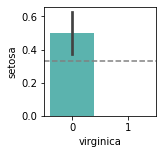


_____________________

sepal_length 
____________________



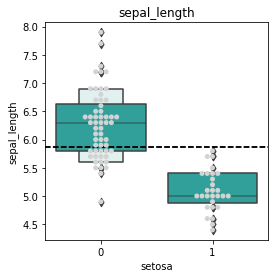

        count      mean       std  min    25%  50%    75%  max
setosa                                                        
0        56.0  6.260714  0.602624  4.9  5.800  6.3  6.625  7.9
1        28.0  5.089286  0.360390  4.4  4.875  5.0  5.400  5.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1511.5, pvalue=4.917738517892763e-12)

____________________

sepal_width 
____________________



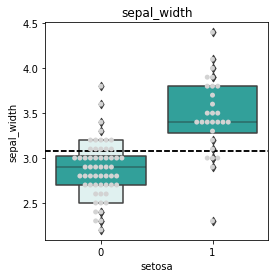

        count      mean       std  min    25%  50%    75%  max
setosa                                                        
0        56.0  2.878571  0.309083  2.2  2.700  2.9  3.025  3.8
1        28.0  3.467857  0.427788  2.3  3.275  3.4  3.800  4.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=187.0, pvalue=1.3354452213646879e-08)

____________________

petal_width 
____________________



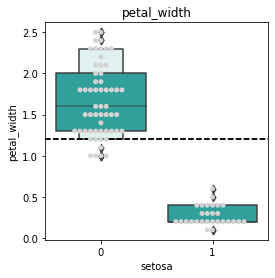

        count      mean       std  min  25%  50%  75%  max
setosa                                                    
0        56.0  1.667857  0.434891  1.0  1.3  1.6  2.0  2.5
1        28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=8.123961949952858e-14)

____________________

measurement_id 
____________________



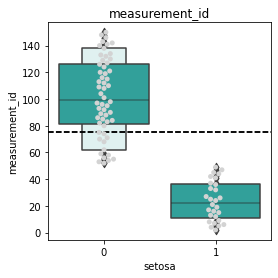

        count        mean        std   min    25%   50%     75%    max
setosa                                                                
0        56.0  101.357143  28.973611  52.0  81.50  99.5  126.25  150.0
1        28.0   23.642857  14.792927   2.0  11.25  22.5   36.25   49.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=1.0502723286022975e-13)

____________________



In [185]:
explore.explore_bivariate(train, "setosa", cat_vars, quant_vars)

virginica 
_____________________

        chi2       p-value  degrees of freedom
0  79.560268  4.677377e-19                   1

observed:
 virginica   0   1  All
virginica             
0          56   0   56
1           0  28   28
All        56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


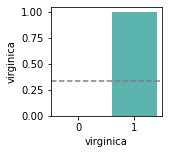


_____________________

sepal_length 
____________________



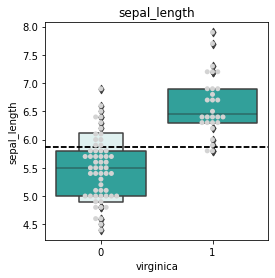

           count      mean       std  min  25%   50%  75%  max
virginica                                                     
0           56.0  5.492857  0.564352  4.4  5.0  5.50  5.8  6.9
1           28.0  6.625000  0.532378  5.8  6.3  6.45  6.9  7.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=108.5, pvalue=1.41909909540468e-10)

____________________

sepal_width 
____________________



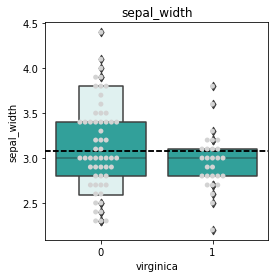

           count      mean       std  min  25%  50%  75%  max
virginica                                                    
0           56.0  3.132143  0.493266  2.3  2.8  3.0  3.4  4.4
1           28.0  2.960714  0.318956  2.2  2.8  3.0  3.1  3.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=938.5, pvalue=0.14243061976857382)

____________________

petal_width 
____________________



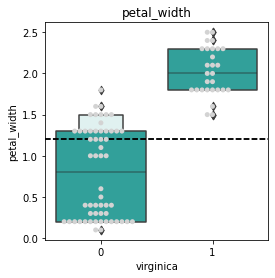

           count      mean       std  min  25%  50%  75%  max
virginica                                                    
0           56.0  0.794643  0.549188  0.1  0.2  0.8  1.3  1.8
1           28.0  2.021429  0.293582  1.5  1.8  2.0  2.3  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=17.0, pvalue=2.7469459984658354e-13)

____________________

measurement_id 
____________________



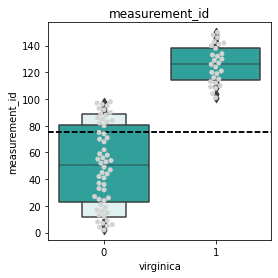

           count        mean        std    min     25%    50%    75%    max
virginica                                                                  
0           56.0   50.125000  30.637507    2.0   23.25   50.5   80.5   98.0
1           28.0  126.107143  14.171801  101.0  114.50  126.5  138.5  150.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=1.0502723286022975e-13)

____________________



In [186]:
explore.explore_bivariate(train, "virginica", cat_vars, quant_vars)

virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 versicolor   0   1  All
virginica              
0           28  28   56
1           28   0   28
All         56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


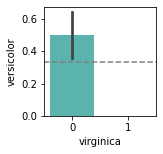


_____________________

sepal_length 
____________________



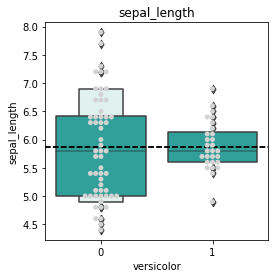

            count      mean       std  min  25%  50%    75%  max
versicolor                                                      
0            56.0  5.857143  0.896226  4.4  5.0  5.8  6.425  7.9
1            28.0  5.896429  0.425556  4.9  5.6  5.8  6.125  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=732.0, pvalue=0.6245929694453309)

____________________

sepal_width 
____________________



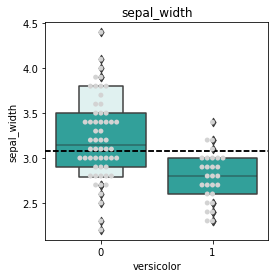

            count      mean       std  min  25%   50%  75%  max
versicolor                                                     
0            56.0  3.214286  0.453042  2.2  2.9  3.15  3.5  4.4
1            28.0  2.796429  0.280848  2.3  2.6  2.80  3.0  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1226.5, pvalue=2.554781908375443e-05)

____________________

petal_width 
____________________



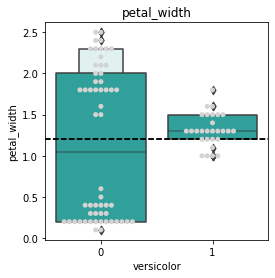

            count      mean       std  min  25%   50%  75%  max
versicolor                                                     
0            56.0  1.148214  0.908744  0.1  0.2  1.05  2.0  2.5
1            28.0  1.314286  0.199470  1.0  1.2  1.30  1.5  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=767.0, pvalue=0.8750261808643868)

____________________

measurement_id 
____________________



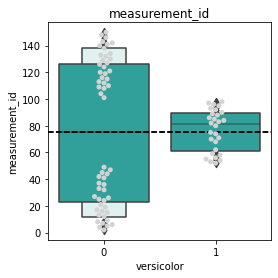

            count       mean        std   min    25%   50%     75%    max
versicolor                                                               
0            56.0  74.875000  53.651421   2.0  23.25  75.0  126.25  150.0
1            28.0  76.607143  15.449654  52.0  61.25  81.0   89.25   98.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=784.0, pvalue=0.9962145582511478)

____________________



In [187]:
explore.explore_bivariate(train, "versicolor", cat_vars, quant_vars)

# Multivariate Stats

TypeError: 'AxesSubplot' object is not subscriptable

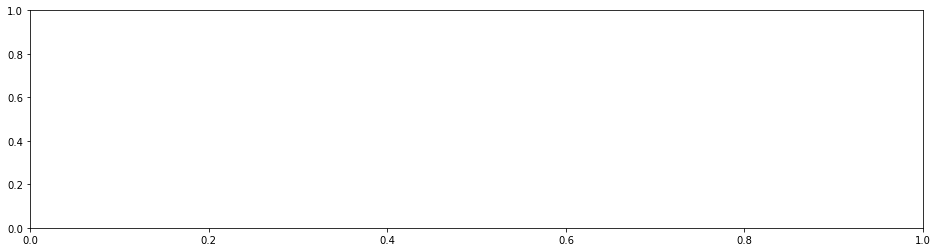

In [190]:
target = "setosa"

explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [191]:
def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()


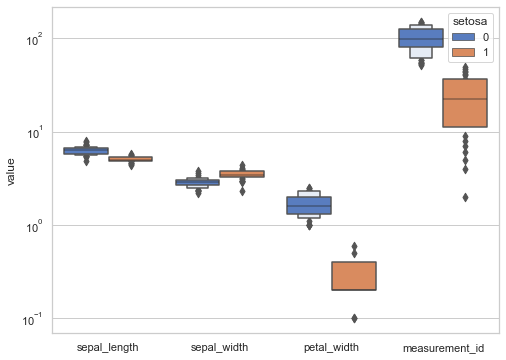

In [192]:
plot_all_continuous_vars(train, target, quant_vars)

In [193]:
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

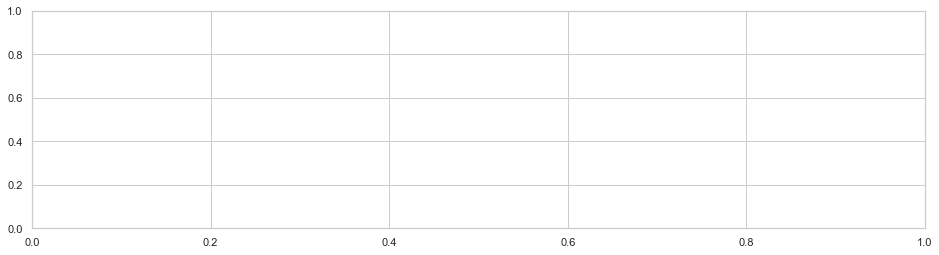

In [195]:
explore.plot_violin_grid_with_color(train, target, cat_vars, quant_vars)

# iris data does not play well with explore.py functions so we have a create your own adventure explore_exercises.ipynb

This is my suggested path forward. You may choose your own adventure for your explore_exercises.ipynb
- If you want a more guided exploration setup, solve the exercises below with seaborn.
- If you want to get more practice with those explore.py functions, use them w/ the Telco dataset

Exercises
Continue in your explore_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

sepal_length x sepal_width
petal_length x petal_width
sepal_area x petal_area
sepal_length x petal_length

4. What are your takeaways? Write them down :)

5. Create a heatmap of each variable layering correlation coefficient on top.

6. Create a scatter matrix visualizing the interaction of each variable.

7. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

8. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

9. What is your takeaway from this statistical testing?

10. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

# continued on explore_exercises.ipynb